## Our first Neural Network

In [3]:
import numpy as np
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras import models, layers, utils, optimizers, losses, metrics

### Data

We start with a task we are familiar with -- classifying grayscale images of handwritten digits into 10 classes (0 to 9). We will use the MNIST dataset which includes 60,000 training images and 10,000 test 
images, each of size 28x28 pixels.

**Loading the data**

In [5]:
from tensorflow.keras.datasets import mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


Let's take a look at the data

In [6]:
# shape
print('train data size is ', Xtrain.shape)
print('test  data size is ', Xtest.shape)

# max/min vals
print('max, min valuse in the train data are ', str(Xtrain.min()) + ', ' + str(Xtrain.max()))

train data size is  (60000, 28, 28)
test  data size is  (10000, 28, 28)
max, min valuse in the train data are  0, 255


Label values

In [7]:
print('The labels in the data are ' + str(np.unique(Ytrain)) + '\n')

The labels in the data are [0 1 2 3 4 5 6 7 8 9]



Label distribution

In [8]:
[print('label ' + str(u) + ' appears ' + str(len(np.where(Ytrain==u)[0])) +' times in the training set, and ' + str(len(np.where(Ytest==u)[0])) +' times in the test set') for u in np.unique(Ytrain)];

label 0 appears 5923 times in the training set, and 980 times in the test set
label 1 appears 6742 times in the training set, and 1135 times in the test set
label 2 appears 5958 times in the training set, and 1032 times in the test set
label 3 appears 6131 times in the training set, and 1010 times in the test set
label 4 appears 5842 times in the training set, and 982 times in the test set
label 5 appears 5421 times in the training set, and 892 times in the test set
label 6 appears 5918 times in the training set, and 958 times in the test set
label 7 appears 6265 times in the training set, and 1028 times in the test set
label 8 appears 5851 times in the training set, and 974 times in the test set
label 9 appears 5949 times in the training set, and 1009 times in the test set


Plotting some samples of the data

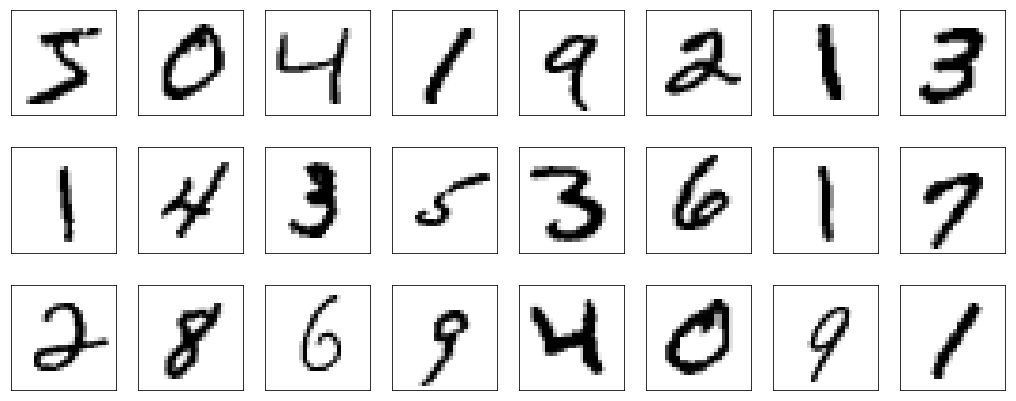

In [9]:
fig, axes = plt.subplots(3, 8, figsize=(18, 7), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.3, wspace=0.1))
for n, ax in enumerate(axes.flat):
    ax.imshow(Xtrain[n], cmap='gist_yarg')

**Data preparation**

We reshape the data, and rescale it so that all its values are in the `[0, 1]` interval.

In [10]:
Xtrain = Xtrain.reshape((60000, 784))/255.0
Xtest = Xtest.reshape((10000, 784))/255.0

We One-Hot encode the labels as categorical (we'll discuss it later)

In [11]:
def OneHot(labels, dim= 10):
    OneHotLabels = np.zeros((len(labels), dim),dtype=int)
    for n, label in enumerate(labels):
        OneHotLabels[n, label] = 1  
    return OneHotLabels

In [12]:
Ytrain_1hot = OneHot(Ytrain)
Ytest_1hot  = OneHot(Ytest)

### Training a network

**Network architecture**

Defining our neural network

In [13]:
# select a model 
network = models.Sequential()

# add a single (hidden) fully connected layer
Layer1Activation = 'relu'
network.add(layers.Dense(16, activation=Layer1Activation, input_shape=(28 * 28,)))

# add an output layer
Layer2Activation = 'softmax'
network.add(layers.Dense(10, activation=Layer2Activation))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


**Network training**

In [15]:
# select an optimizer
rms = optimizers.RMSprop(lr=0.0005, rho=.9, decay=0)

# select a loss
loss = losses.categorical_crossentropy

# select metrics to monitor during training
metrics = ['accuracy']

# compile the network
network.compile(optimizer=rms, loss=loss, metrics=metrics)

# train the network
network.fit(Xtrain, Ytrain_1hot, epochs=10, batch_size=128);

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.8067 - acc: 0.7952
Epoch 2/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3454 - acc: 0.9032
Epoch 3/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2941 - acc: 0.9167
Epoch 4/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2671 - acc: 0.9236
Epoch 5/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2486 - acc: 0.9289
Epoch 6/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2350 - acc: 0.9323
Epoch 7/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2242 - acc: 0.9361
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2158 - acc: 0.9376
Epoch 9/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2090 - acc: 0.9402
Epoch 10/10
60000/60000 [=========

**Performance evaluation**

In [16]:
_, accuracy = network.evaluate(Xtrain, Ytrain_1hot, verbose=0)
print('train accuracy =', accuracy)

train accuracy = 0.94238335


In [17]:
_, accuracy  = network.evaluate(Xtest, Ytest_1hot, verbose=0)
print('test accuracy =', accuracy)

test accuracy = 0.9386


#### Exercise

1. Repeat the above for the following number of neurons in the hidden layer: 64/128/512. Discuss the effect of this change. 
2. Train the above network with 128 units in the hidden layer for 5 epochs and for 20 epochs. Discuss the effect of this change.

#### Solution